<a href="https://colab.research.google.com/github/Mar-celo/Enap/blob/master/Titanic_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: árvore de decisão


Usando dados do Titanic, descritos em: https://www.openml.org/d/40945

## Análise exploratória dos dados

In [ ]:
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [ ]:
#df = pd.read_csv('http://bit.ly/kaggletrain')
df = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl', na_values='?')

In [ ]:
df.shape

(1309, 14)

In [ ]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
df.cabin

0            B5
1       C22 C26
2       C22 C26
3       C22 C26
4       C22 C26
         ...   
1304        NaN
1305        NaN
1306        NaN
1307        NaN
1308        NaN
Name: cabin, Length: 1309, dtype: object

In [ ]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
titanic = df.loc[df.embarked.notna() & df.age.notna(), ['age', 'pclass', 'sex', 'embarked', 'survived']]

In [ ]:
titanic.isna().sum()

age         0
pclass      0
sex         0
embarked    0
survived    0
dtype: int64

In [ ]:
titanic.shape

(1044, 5)

In [ ]:
titanic.head()

,age,pclass,sex,embarked,survived
0,29.0000,1,female,S,1
1,0.9167,1,male,S,1
2,2.0000,1,female,S,0
3,30.0000,1,male,S,0
4,25.0000,1,female,S,0


In [ ]:
titanic.survived.value_counts()

0    619
1    425
Name: survived, dtype: int64

In [ ]:
titanic.survived.value_counts(normalize=True)

0    0.592912
1    0.407088
Name: survived, dtype: float64

dica:  
Qual a accurácia mínima aceitável?  
Em casos de classificação binária como este, seria 61,89% (predição da classe predominante: '0' = Não sobreviveu!)

In [ ]:
X, y = titanic.iloc[:,:-1], titanic.iloc[:,-1:]

In [ ]:
X

,age,pclass,sex,embarked
0,29.0000,1,female,S
1,0.9167,1,male,S
2,2.0000,1,female,S
3,30.0000,1,male,S
4,25.0000,1,female,S
...,...,...,...,...
1301,45.5000,3,male,C
1304,14.5000,3,female,C
1306,26.5000,3,male,C
1307,27.0000,3,male,C


In [ ]:
y

,survived
0,1
1,1
2,0
3,0
4,0
...,...
1301,0
1304,0
1306,0
1307,0


## Encoding variáveis (features) categoricas :
Se as variáveis não possuem uma ordem específica, geralmente a melhor opção é one hot-encoding (dummy encoding)

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
hot_enc = OneHotEncoder(sparse=False)

In [ ]:
titanic.head()

,age,pclass,sex,embarked,survived
0,29.0000,1,female,S,1
1,0.9167,1,male,S,1
2,2.0000,1,female,S,0
3,30.0000,1,male,S,0
4,25.0000,1,female,S,0


### Codificando todas as variáveis: 'sex' e 'embarked' 

In [ ]:
X.head()

,age,pclass,sex,embarked
0,29.0000,1,female,S
1,0.9167,1,male,S
2,2.0000,1,female,S
3,30.0000,1,male,S
4,25.0000,1,female,S


In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
col_transf = make_column_transformer((OneHotEncoder(), ['sex','embarked']),
                                     remainder='passthrough')

In [ ]:
X_encoded = col_transf.fit_transform(X)

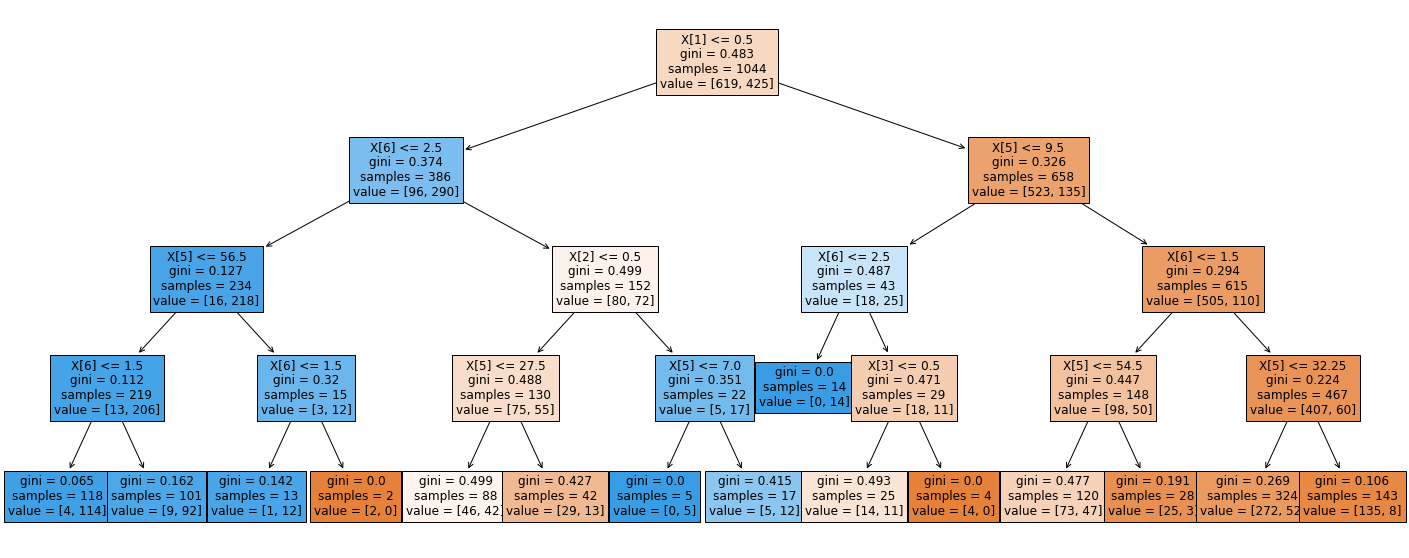

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=4).fit(X_encoded, y)
plt.figure(figsize=(25,10))
plot_tree(clf, filled=True, fontsize=12)
plt.show()

In [ ]:
titanic

,age,pclass,sex,embarked,survived
0,29.0000,1,female,S,1
1,0.9167,1,male,S,1
2,2.0000,1,female,S,0
3,30.0000,1,male,S,0
4,25.0000,1,female,S,0
...,...,...,...,...,...
1301,45.5000,3,male,C,0
1304,14.5000,3,female,C,0
1306,26.5000,3,male,C,0
1307,27.0000,3,male,C,0


In [ ]:
import pandas as pd

In [ ]:
X_dummies = pd.get_dummies(titanic.iloc[:,:-1])
X_dummies

,age,pclass,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,29.0000,1,1,0,0,0,1
1,0.9167,1,0,1,0,0,1
2,2.0000,1,1,0,0,0,1
3,30.0000,1,0,1,0,0,1
4,25.0000,1,1,0,0,0,1
...,...,...,...,...,...,...,...
1301,45.5000,3,0,1,1,0,0
1304,14.5000,3,1,0,1,0,0
1306,26.5000,3,0,1,1,0,0
1307,27.0000,3,0,1,1,0,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

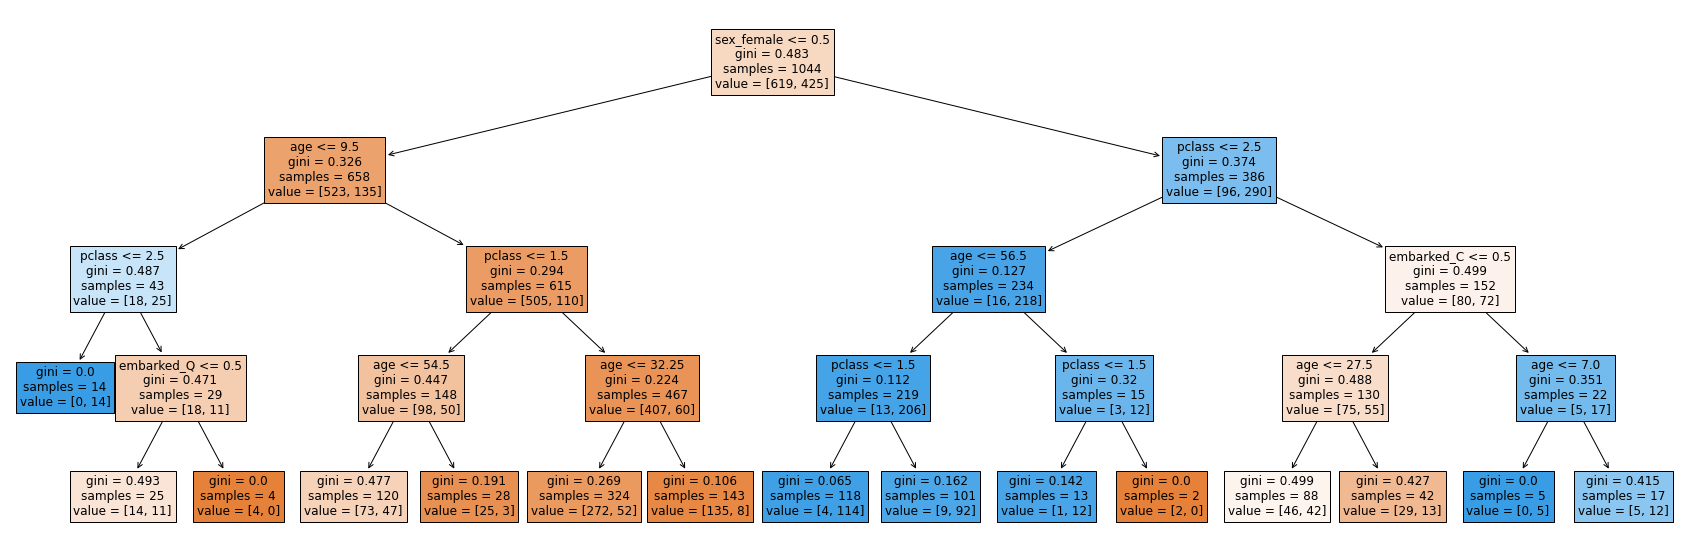

In [ ]:
clf = DecisionTreeClassifier(max_depth=4).fit(X_dummies, y)
plt.figure(figsize=(30,10))
plot_tree(clf, filled=True, fontsize=12, feature_names=X_dummies.columns)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.3,
                                                    random_state=42)

In [ ]:
clf = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

0.8121019108280255

In [ ]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
reg_log.score(X_test, y_test)


F:\progs\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7834394904458599

### Próximos passos

Que tal agora aplicarmos árvores de decisão para o problema de previsão de renda familiar no questionário socio-econômico do Enem? Qual a sequência de escolhas que melhor permite prever a renda familiar?

Árvore de regressão com gastos em publicidade (caderno base na aula 03)

Aplicação de árvores de decisão em seus projetos!